
# Project: The Movie DataBase Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>The analysis is based on the dataset gotten from [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True) it contains 21 distinct columns with 10806 rows
The information about the columns are not given in the link, thus the following are a description based on external findings.

> id: Identification Number
    
>imdb_id: IMDb Identification Number

>popularity: The Popularity rate of the movie

>budget: Movie Estimated Cost of production

>revenue: Movie Estimated Revenue

>original_title: The Title of the Movie

>cast: Cast/ Main characters in the movie

>homepage: Movie website

>director: The director of the movie

>tagline: Catchy Phrase for the movie

>keywords: Keyword used in the movie

>overview: Overview of the movie 

>runtime: The Length of the movei in minutes

>genres: The Movie genres

>production_companies: The companies that produced the movie

>release_date: The Exact date the movie was released

>release_year: The Year the movie was released

>vote_count: How many people voted for the movie

>vote_average: The average vote rate between 0 and 10

>budget_adj:

>revenue_adj:





### Question(s) for Analysis

> ### WHAT YEARS ARE THE MOST PROFITABLE YEARS IN THE MOVIE INDUSTRY?

> ### WHAT RELEASE MONTHS RECORD THE HIGHEST NUMBER OF PROFIT?

> ### Which Director should be considered for contracts based on profitability track record?

> ### WHAT YEARS ARE THE MOST POPULAR YEARS IN THE MOVIE INDUSTRY?

> ### Which director is the most popular?

> ### Bonus Check

> ### What genres are the most Poplar from year to year?

> ### What genres are Profitable from year to year?

> ### What genres are most popular?

> ### What particular genres are most Profitable?

> ### What group of genres are asociated with High popularity?

> ### What Group of genres are associated with the highest profit?

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
# Data Wrangling


In [3]:
# Load your data and print out a few lines.

# If this doesnt load kindly restart kernel and run again
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



# Data Cleaning

### Check Data Types

In [4]:
# Check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Notice that there are some columns with null values such as: Director, Genres, Production Companies. 

### Check for Duplicated and Dedupe

In [5]:
# check for duplicated data
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [6]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

## Subset the DataFrame to Only Relevant Columns
Based on the questions we want to answer, we wont be needing some columns and we have to drop them

In [7]:
# Subset our dataframe to only relevant columns
df.drop(columns = ["imdb_id", "homepage", "tagline", "keywords", "overview", "budget_adj", "revenue_adj", "vote_count", "vote_average","cast", "production_companies"],inplace =True)

## Create a new column Profit and Insert into DataFrame
   Revenue cannnot be the true representation of Profitability and based on our reserach questions we want to measure profitability, hence the need to calculate our profit

In [8]:
# Create a new dataframe called profit
profit =df.revenue - df.budget

In [9]:
# Insert the new dataframe into a specific location
df.insert(4, "profit", profit)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
profit            10865 non-null int64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 1018.6+ KB


Notice that there are still columns with null values
lets perform additional checks


## Investigate columns with  Null values

In [10]:
# Check the genre column for its null values
df[df.genres.isnull()].head()

,id,popularity,budget,revenue,profit,original_title,director,runtime,genres,release_date,release_year
424,363869,0.244648,0,0,0,Belli di papÃ,Guido Chiesa,100,NaN,10/29/15,2015
620,361043,0.129696,0,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,2015
997,287663,0.330431,0,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,NaN,10/3/14,2014
1712,21634,0.302095,0,0,0,Prayers for Bobby,Russell Mulcahy,88,NaN,2/27/09,2009
1897,40534,0.020701,0,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,NaN,2/27/09,2009


In [11]:
# Verify the null values using the original title
df.query("original_title == ['Star Wars Rebels: Spark of Rebellion', 'Prayers for Bobby', 'Jonas Brothers: The Concert Experience']")

,id,popularity,budget,revenue,profit,original_title,director,runtime,genres,release_date,release_year
997,287663,0.330431,0,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,NaN,10/3/14,2014
1712,21634,0.302095,0,0,0,Prayers for Bobby,Russell Mulcahy,88,NaN,2/27/09,2009
1897,40534,0.020701,0,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,NaN,2/27/09,2009


Note that the genre null values are associated with Zero values for budget, Revenue and Profit

## Perform Further Investigation

In [12]:
# Find the minimum value of the numeric columns
df.describe()

,id,popularity,budget,revenue,profit,runtime,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,2.520261e+07,102.071790,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,9.659103e+07,31.382701,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,-4.139124e+08,0.000000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,9.092453e+06,111.000000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,900.000000,2015.000000


We can see that the runtime, budget and revenue columns have zero values in them but this zero value doesnt reflect using df.info()
we will leave out profit because whatever is done on budget and revenue will affect profit

## Check zero values

In [13]:
# count the rows with zero runtime
df.query("runtime == '0'")["runtime"].count()

31

In [14]:
# Alternative counting method
(df["runtime"]==0).value_counts()

False    10834
True        31
Name: runtime, dtype: int64

In [15]:
(df["budget"]==0).value_counts()

True     5696
False    5169
Name: budget, dtype: int64

In [16]:
(df["revenue"]==0).value_counts()

True     6016
False    4849
Name: revenue, dtype: int64

## Replace the Zeros with NaN

Use Numpy to change Zero values to Null values to aid dropping

In [17]:
# Replace the Zero values
cols = ["runtime","budget", "revenue"]
for col in cols:
    df[col].replace(0,np.NaN, inplace=True)
    

## Drop null values
Since no real movie can have zero runtime we can confidently drop them.
Arguably, every movie must also have a budget, and a revenue if at all they can make profit.

In [18]:
# Drop cols with null values
df.dropna(subset=["runtime", "budget","revenue"], inplace =True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
id                3854 non-null int64
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
profit            3854 non-null int64
original_title    3854 non-null object
director          3853 non-null object
runtime           3854 non-null float64
genres            3854 non-null object
release_date      3854 non-null object
release_year      3854 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 361.3+ KB


Notice that the null values in our genres has been catered for but lets check it again

In [20]:
df.genres.isnull().sum()

0

In [21]:
# Check the minimum values of the numeric columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,3854.0,3.988819e+04,6.722253e+04,5.000000e+00,6.073500e+03,1.132150e+04,3.857325e+04,4.178590e+05
popularity,3854.0,1.191554e+00,1.475162e+00,1.117000e-03,4.623675e-01,7.975105e-01,1.368324e+00,3.298576e+01
budget,3854.0,3.720370e+07,4.220822e+07,1.000000e+00,1.000000e+07,2.400000e+07,5.000000e+07,4.250000e+08
revenue,3854.0,1.076866e+08,1.765393e+08,2.000000e+00,1.360003e+07,4.480000e+07,1.242125e+08,2.781506e+09
profit,3854.0,7.048292e+07,1.506195e+08,-4.139124e+08,-1.321535e+06,2.002019e+07,8.170331e+07,2.544506e+09
runtime,3854.0,1.092203e+02,1.992282e+01,1.500000e+01,9.500000e+01,1.060000e+02,1.190000e+02,3.380000e+02
release_year,3854.0,2.001261e+03,1.128257e+01,1.960000e+03,1.995000e+03,2.004000e+03,2.010000e+03,2.015000e+03


## Drop the ID column
we really wouldnt be needing the ID column so lets drop it

In [22]:
df.drop(columns = "id", inplace =True)

## Lets see our cleaned Data

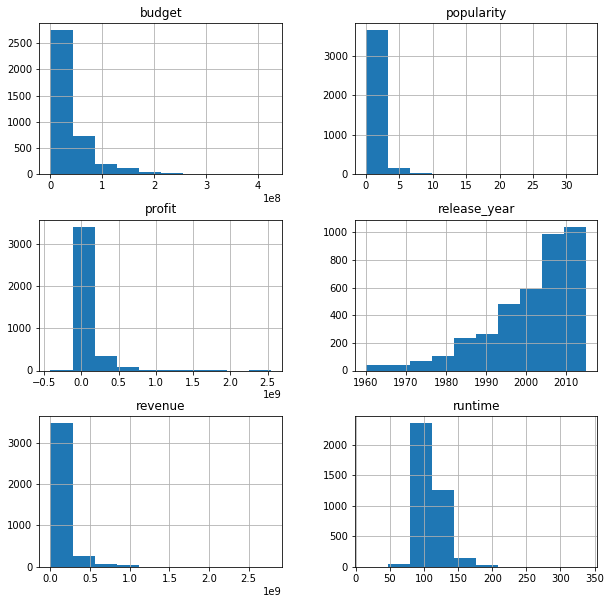

In [23]:
df.hist(figsize=(10,10));

### Check data Types Again
We ought to have checked this the other time but we had to deal with the null values first.
However the data need not much cleaning, hence we just need to change the release date and extract necessary information from it

In [24]:
# Check the release date datatype
df.release_date

0          6/9/15
1         5/13/15
2         3/18/15
3        12/15/15
4          4/1/15
           ...   
10822     6/21/66
10828     7/13/66
10829    12/17/66
10835    12/20/66
10848     8/24/66
Name: release_date, Length: 3854, dtype: object

Notice that the release date inludes values from ??66
lets check our release year to confirm the original year

In [25]:
df.release_year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10822    1966
10828    1966
10829    1966
10835    1966
10848    1966
Name: release_year, Length: 3854, dtype: int64

Notice that the year inludes 1966-2015

In [26]:
# Convert the release date column to date time field
df.release_date=pd.to_datetime(df.release_date)

In [27]:
# Check your datatype conversion
df.release_date.tail()

10822   2066-06-21
10828   2066-07-13
10829   2066-12-17
10835   2066-12-20
10848   2066-08-24
Name: release_date, dtype: datetime64[ns]

The date indicates the future, we need to adjust the date the date to correctly display 1966

In [28]:
# Convert date years above 2022 to a century ago, this wil return the date years to their original values
df.release_date = np.where(df.release_date.dt.year>2022, df.release_date - pd.offsets.DateOffset(years=100), df.release_date)

In [29]:
# Confirm changes
df.release_date

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10822   1966-06-21
10828   1966-07-13
10829   1966-12-17
10835   1966-12-20
10848   1966-08-24
Name: release_date, Length: 3854, dtype: datetime64[ns]

### Extract the month from the release date column
Then create a new column and drop the release date column

In [30]:
df['release_month'] = df.release_date.dt.month

In [31]:
# drop the release date column
df.drop(columns= "release_date", inplace=True)

In [32]:
# Verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
profit            3854 non-null int64
original_title    3854 non-null object
director          3853 non-null object
runtime           3854 non-null float64
genres            3854 non-null object
release_year      3854 non-null int64
release_month     3854 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 331.2+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### WHAT YEARS ARE THE MOST PROFITABLE YEARS IN THE MOVIE INDUSTRY?

To answer this question we have to categorize our profit into high(>75%) and low(<25%)


In [33]:
# Using the bins method of dividing data based on  High-Low
df["profit"].describe()

count    3.854000e+03
mean     7.048292e+07
std      1.506195e+08
min     -4.139124e+08
25%     -1.321535e+06
50%      2.002019e+07
75%      8.170331e+07
max      2.544506e+09
Name: profit, dtype: float64

In [34]:
# create a data frame that houses the high and low profit
low_profit = df[df["profit"]<=df.profit.quantile(.25)].sort_values(by=["profit"], ascending=[False])
high_profit = df[df.profit>=df.profit.quantile(.75)].sort_values(by=["profit"], ascending=[False])

Low profit means profit value between the lowest profit (losses) and the values in the lower quatile(smalest values of profit) of the profit column
High profit means profit above the upper quartile of the profit column which refer to the most profitable

## Compute the most profitable years
To do this we need to group the high profit column based on the release year and then find the mean profit for each row 

Lets find out how many years we have

In [35]:
df.release_year.nunique()

56

In [36]:
high_profit.release_year.nunique()

51

We can see that only 51 out of 56 unique years have the most profit

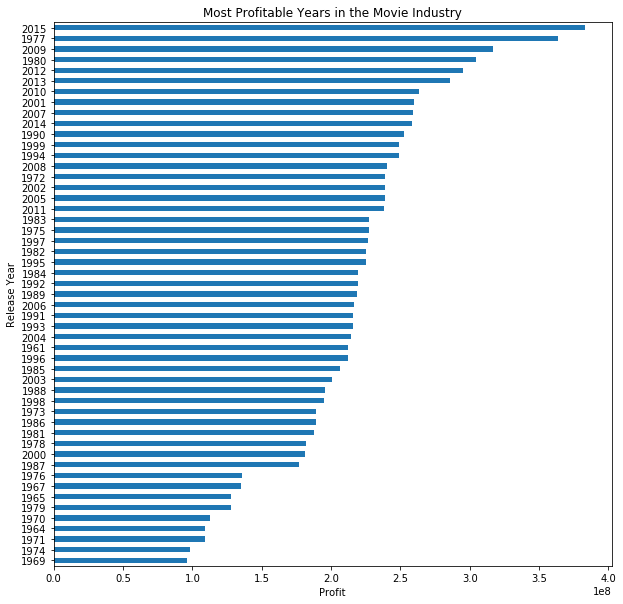

In [37]:
high_profit.groupby(["release_year"])["profit"].mean().sort_values(ascending=[True]).plot(kind = "barh", figsize=(10,10));
plt.xlabel("Profit")
plt.ylabel("Release Year")
plt.title("Most Profitable Years in the Movie Industry")
plt.show()

From the plot we can see that the most profitable year in the movie industry is the year 2015, the top 5 years are
>-2015, 1977, 2009, 1980 and 2012

### WHAT RELEASE MONTHS RECORD THE HIGHEST NUMBER OF PROFIT?

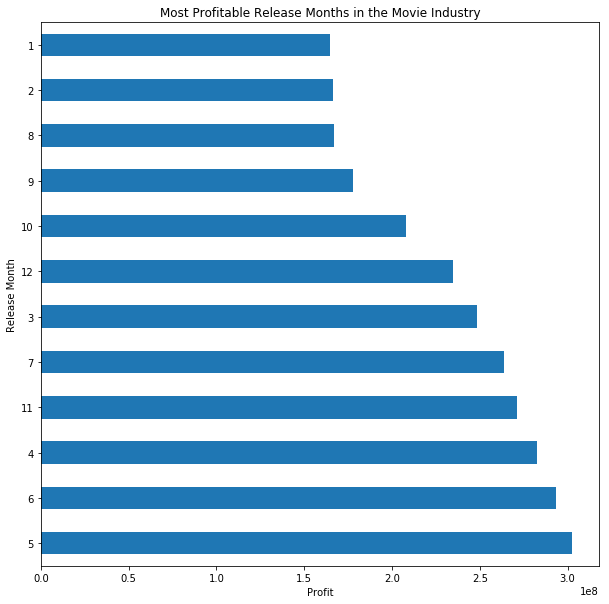

In [38]:
high_profit.groupby(["release_month"])["profit"].mean().sort_values(ascending=[False]).plot(kind = "barh", figsize=(10,10));
plt.xlabel("Profit")
plt.ylabel("Release Month")
plt.title("Most Profitable Release Months in the Movie Industry")
plt.show()

We can conclude that the month of May, June, April, November and July hold the highest profit, this indicates that the second quater of every year could encourage profit if it is the target release_month

Lets also check for release years and month that hold the worst profit

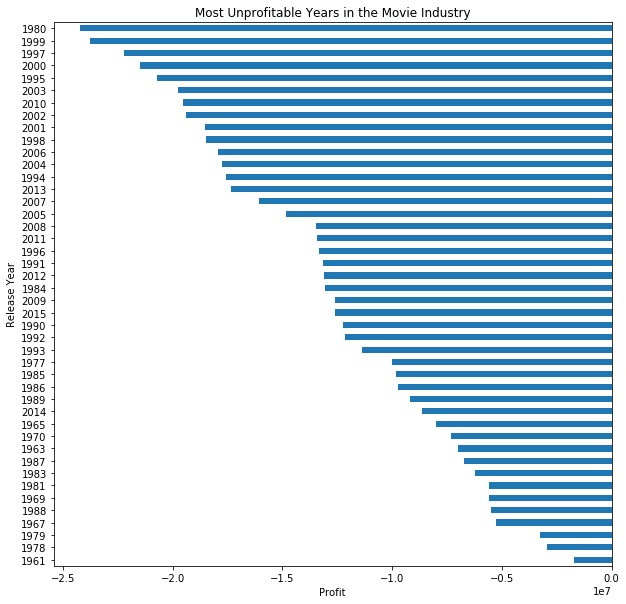

In [39]:
low_profit.groupby(["release_year"])["profit"].mean().sort_values(ascending=[False]).plot(kind = "barh", figsize=(10,10));
plt.xlabel("Profit")
plt.ylabel("Release Year")
plt.title("Most Unprofitable Years in the Movie Industry")
plt.show()

We can see that the years 1980 - 2000 hold the most losses

## What months are associated with low profit?

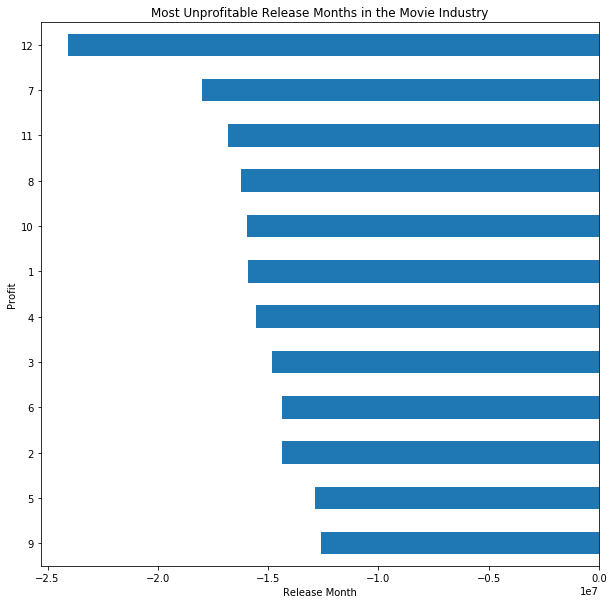

In [40]:
low_profit.groupby(["release_month"])["profit"].mean().sort_values(ascending=[False]).plot(kind = "barh", figsize=(10,10));
plt.ylabel("Profit")
plt.xlabel("Release Month")
plt.title("Most Unprofitable Release Months in the Movie Industry")
plt.show()

As we can see, movie release should be avoided in the last quater of the year especialy December

## Verify the findings from the entire data Frame

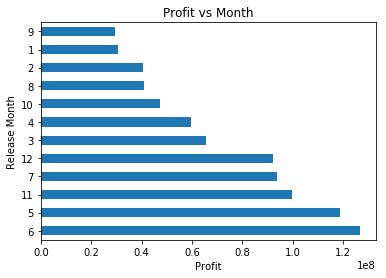

In [41]:
df.groupby("release_month")["profit"].mean().sort_values(ascending=False).plot(kind="barh");
plt.xlabel("Profit")
plt.ylabel("Release Month")
plt.title ("Profit vs Month");

As proven above the conclusions are valid, if you want to make profit, make sure you release your movies in the second quater of the year especially between May and June

## Which Director should be considered for contracts based on profitability track record?

To answer this we need to split our director column, some have more than one directors, hence we need to split to know who should be employed

In [42]:
# Check the shape of the dataframe
df.shape

(3854, 10)

In [43]:
# Take a look at the director column to monitor changes
df.director.head(10)

0                   Colin Trevorrow
1                     George Miller
2                  Robert Schwentke
3                       J.J. Abrams
4                         James Wan
5    Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6                       Alan Taylor
7                      Ridley Scott
8          Kyle Balda|Pierre Coffin
9                       Pete Docter
Name: director, dtype: object

In [44]:
# We need to split the director column to return a list per column
df.director=df.director.str.split("|")

In [45]:
# Notice index 8 was split into two directors
df.director.head(10)

0                   [Colin Trevorrow]
1                     [George Miller]
2                  [Robert Schwentke]
3                       [J.J. Abrams]
4                         [James Wan]
5    [Alejandro GonzÃ¡lez IÃ±Ã¡rritu]
6                       [Alan Taylor]
7                      [Ridley Scott]
8         [Kyle Balda, Pierre Coffin]
9                       [Pete Docter]
Name: director, dtype: object

In [46]:
# we need to identify each director hence the explode function would come in handy
df=df.explode("director")

In [47]:
# Notice index 8 was split into two rows
df.director.head(10)

0                   Colin Trevorrow
1                     George Miller
2                  Robert Schwentke
3                       J.J. Abrams
4                         James Wan
5    Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6                       Alan Taylor
7                      Ridley Scott
8                        Kyle Balda
8                     Pierre Coffin
Name: director, dtype: object

In [48]:
# Notice the new shape of the dataframe
df.shape

(4165, 10)

## Compression Function
Lets compress the steps above into a simple function to avoid repetitive codes

In [49]:
def burst(data, col):
    """
    This function receives a dataframe, splits the column
    to transform it to a list and uses the explode function
    to split the rows
    """
    data[col]= data[col].str.split("|")
    data = data.explode(col)
    return data

Lets find out which director directed the most movies

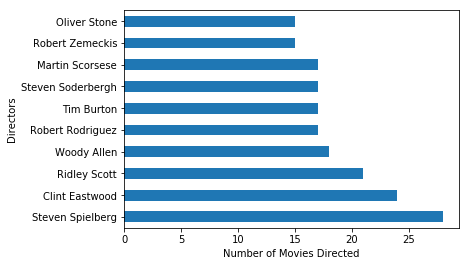

In [50]:
# count the 
df.director.value_counts().head(10).plot.barh();
plt.ylabel("Directors")
plt.xlabel("Number of Movies Directed");

We can see that Steven Speilberg, Clint Eastwood, RIdley Scott and Wooden Allen Have directed the most movies hence they might have more experience

However to answer the question we need profitability more than we need experience
Hence, we need to find the most profitable director

In [51]:
df.groupby('director')['profit'].mean().idxmax()

'Jennifer Lee'

It appears that Jennifer Lee is the most profitable Director and should be employed

In [52]:
# Check the top profitable Directors
df.groupby("director")["profit"].mean().sort_values(ascending=False)

director
Jennifer Lee         1.124219e+09
Irwin Winkler        1.084280e+09
David Yates          8.448239e+08
Pierre Coffin        8.173356e+08
Mike Thurmeier       7.822448e+08
                         ...     
Lawrence Kasanoff   -6.492629e+07
Joby Harold         -7.162618e+07
Robert Walker       -9.999975e+07
Aaron Blaise        -9.999975e+07
Sngmoo Lee          -4.139124e+08
Name: profit, Length: 1785, dtype: float64

The most profitable directors are
> -Jennifer Lee

> -Irwin Winkler

> -David Yates

> -Pierre Coffin

> -Mike Thurmeier

## Lets check our most successful directors

In [53]:
# Explode the directors in or high profit class
print(high_profit.shape)
high_profit=burst(high_profit, "director")
high_profit.shape

(964, 10)


(1056, 10)

In [54]:
high_profit.director.head(10)

0                   Colin Trevorrow
1                     George Miller
2                  Robert Schwentke
3                       J.J. Abrams
4                         James Wan
5    Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6                       Alan Taylor
7                      Ridley Scott
8                        Kyle Balda
8                     Pierre Coffin
Name: director, dtype: object

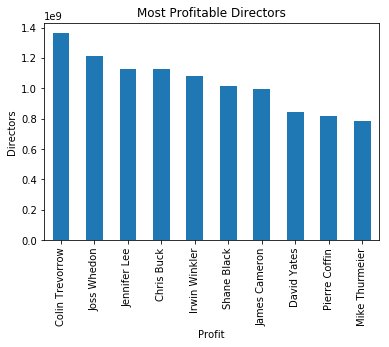

In [55]:
# Lets plot to see the most successful directors
high_profit.groupby("director")["profit"].mean().sort_values(ascending=False).head(10).plot.bar();
plt.ylabel("Directors")
plt.title("Most Profitable Directors")
plt.xlabel("Profit");

It appears that based on the highly successful class we can consider the following directors as successful

>--Colin Trevorrow

> -- Joss Whedon

> --Irwin Winkler

> --Jennifer Lee

> --Chris Buck


## Lets check directors that are associated with no profit

In [56]:
print(low_profit.shape)
low_profit = burst(low_profit, "director")
low_profit.shape

(964, 10)


(1037, 10)

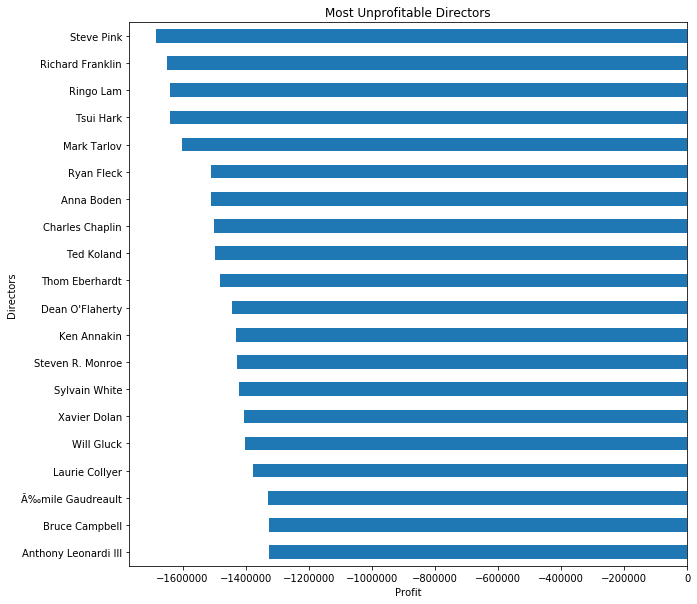

In [57]:
plt.subplots(figsize=(10,10))
low_profit.groupby("director")["profit"].mean().sort_values(ascending=False).head(20).plot.barh();
plt.ylabel("Directors")
plt.title("Most Unprofitable Directors")
plt.xlabel("Profit");

These Directors are associated with low profit

### WHAT YEARS ARE THE MOST POPULAR YEARS IN THE MOVIE INDUSTRY?

In [58]:
# Using the bins method of dividing data based on  High-Low
df.popularity.describe()

count    4165.000000
mean        1.212112
std         1.482326
min         0.001117
25%         0.466900
50%         0.819111
75%         1.406682
max        32.985763
Name: popularity, dtype: float64

## Compute the most popular years
To do this we need to group the high popularity column based on the release year and then find the mean popularity for each row 

In [59]:
# create low and high popularity bins
low_pop= df[df.popularity<=df.popularity.quantile(.25)].sort_values(by=["popularity"], ascending=[True])
high_pop= df[df.popularity>=df.popularity.quantile(.75)].sort_values(by=["popularity"], ascending=[False])


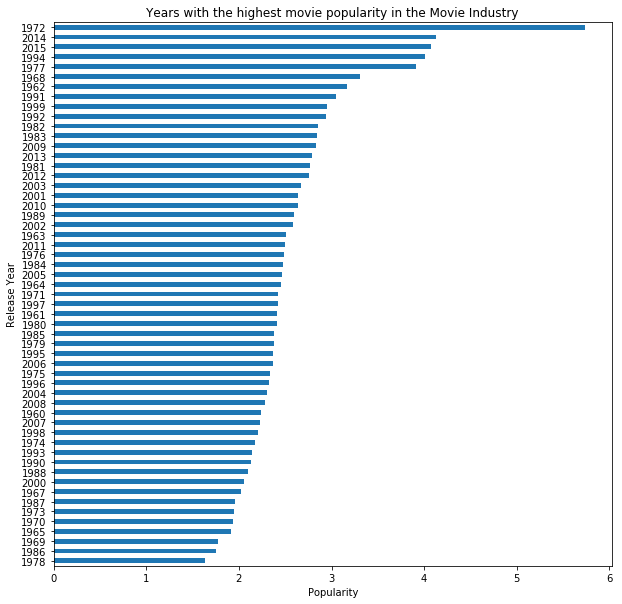

In [60]:
# Visualize the years with the highest popularity
high_pop.groupby(["release_year"])["popularity"].mean().sort_values(ascending=[True]).plot(kind = "barh", figsize=(10,10));
plt.xlabel("Popularity")
plt.ylabel("Release Year")
plt.title("Years with the highest movie popularity in the Movie Industry")
plt.show()

The data show that the movie industry enjoyed the most popularity in the years
>> 1972
>> --2015
>> --2014
>> --1994
>> --1977

## Which release month draws the most popularity to the movie industry?

To do this we must group the high popuarity group based on the release month

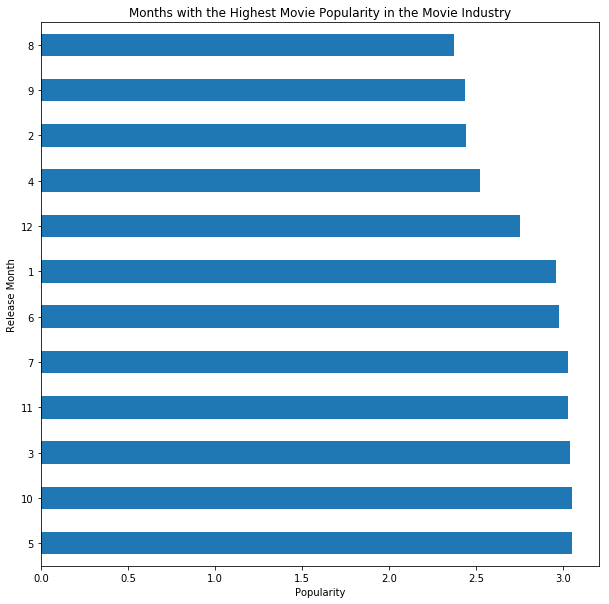

In [61]:
high_pop.groupby(["release_month"])["popularity"].mean().sort_values(ascending=[False]).plot(kind = "barh", figsize=(10,10));
plt.xlabel("Popularity")
plt.ylabel("Release Month")
plt.title("Months with the Highest Movie Popularity in the Movie Industry")
plt.show()

Movies are most likely to be very popular when they are released in the month of March to November and a chunk of popularity is accrued in the second quater of the year 

## What months draw the least popularity?

Lets first see the worst years of unpopularity in the movie industry

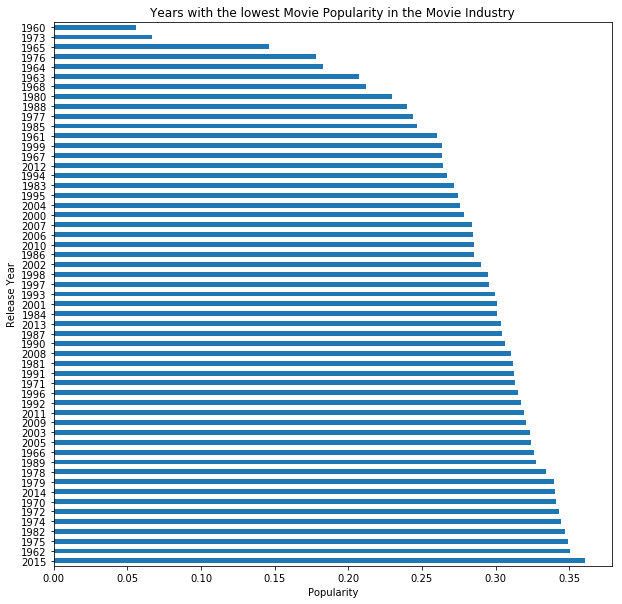

In [62]:
low_pop.groupby(["release_year"])["popularity"].mean().sort_values(ascending=[False]).plot(kind = "barh", figsize=(10,10));
plt.xlabel("Popularity")
plt.ylabel("Release Year")
plt.title("Years with the lowest Movie Popularity in the Movie Industry")
plt.show()

The years with the lowest popularity are
>>Between 1960 and 1980

Lets see what months to draw least popularity

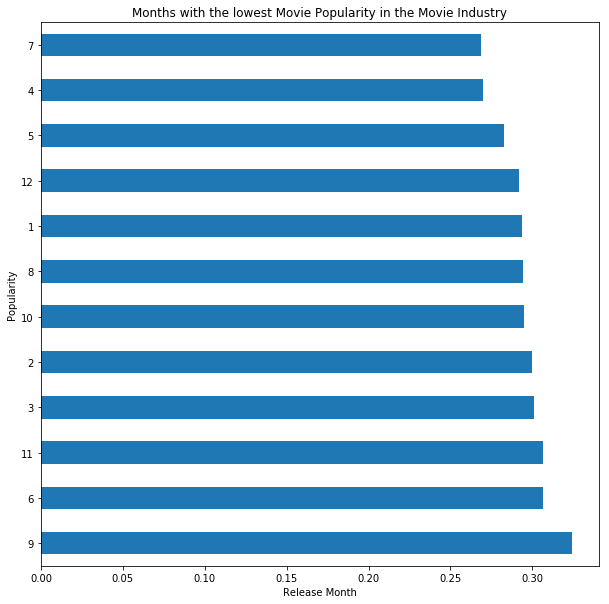

In [63]:
low_pop.groupby(["release_month"])["popularity"].mean().sort_values(ascending=[False]).plot(x="release_month",y= "popularity", kind = "barh", figsize=(10,10));
plt.ylabel("Popularity")
plt.xlabel("Release Month")
plt.title("Months with the lowest Movie Popularity in the Movie Industry")
plt.show()

The chart above shows us that movie released in the first quarter and last quater of the year are often unpopular

## To resolve the conflict lets verify with the entire dataframe

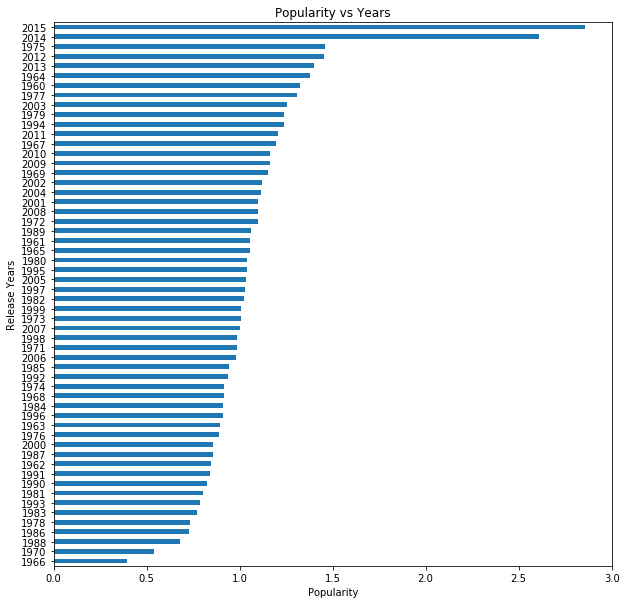

In [64]:
df.groupby("release_year")["popularity"].mean().sort_values(ascending=True).plot(kind="barh", figsize=(10,10));
plt.xlabel("Popularity")
plt.ylabel("Release Years")
plt.title ("Popularity vs Years");

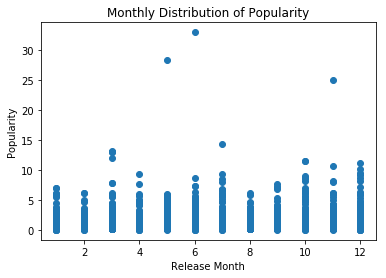

In [65]:
plt.scatter(df.release_month, df.popularity);
plt.ylabel("Popularity")
plt.xlabel("Release Month")
plt.title ("Monthly Distribution of Popularity");

The dataset confirms our findings that movies released in the second quarter of the year often end up popular and movies released in the first and last quarter(with November being an exception) often end up unpopular

## Which director is the most popular?

Lets check with the entire data frame

In [66]:
df.groupby('director')['popularity'].mean().idxmax()

'Colin Trevorrow'

In [67]:
df.groupby("director")["popularity"].mean().sort_values(ascending=False)

director
Colin Trevorrow      16.696886
Chad Stahelski       11.422751
David Leitch         11.422751
Morten Tyldum         8.110711
Christopher Nolan     7.695094
                       ...    
Brett Morgen          0.017708
Lamont Johnson        0.015727
Fyodor Bondarchuk     0.010335
Zana Briski           0.001117
Ross Kauffman         0.001117
Name: popularity, Length: 1785, dtype: float64

The entire Data reveals Colin Treverrow as the most popular Director

Lets check with the high popularity class

In [68]:
print(high_pop.shape)
high_pop = burst(high_pop, "director")
high_pop.shape

(1042, 10)


(1292, 10)

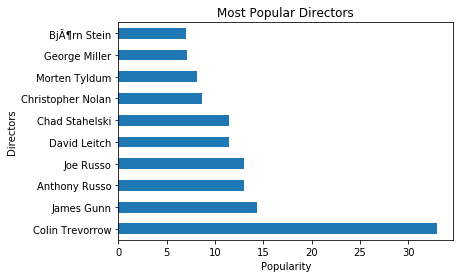

In [69]:
high_pop.groupby("director")["popularity"].mean().sort_values(ascending=False).head(10).plot.barh();
plt.ylabel("Directors")
plt.title("Most Popular Directors")
plt.xlabel("Popularity");

This confirms our findings that Colin Treverrow is the most popular Director

Lets check with the low popularity group

In [70]:
print(low_pop.shape)
low_pop = burst(low_pop, "director")
low_pop.shape

(1044, 10)


(1206, 10)

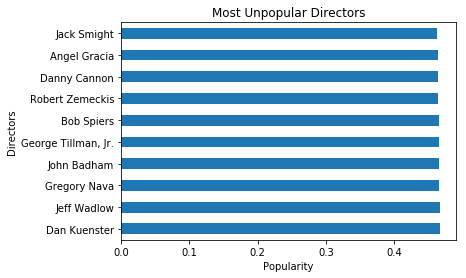

In [71]:
low_pop.groupby("director")["popularity"].mean().sort_values(ascending=False).head(10).plot.barh();
plt.ylabel("Directors")
plt.title("Most Unpopular Directors")
plt.xlabel("Popularity");

These Directora are unpopular

## Bonus Check

In [72]:
df.query("director=='Colin Trevorrow'")

,popularity,budget,revenue,profit,original_title,director,runtime,genres,release_year,release_month
0,32.985763,150000000.0,1.513529e+09,1363528810,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015,6
4604,0.408010,750000.0,4.007792e+06,3257792,Safety Not Guaranteed,Colin Trevorrow,85.0,Comedy|Romance|Science Fiction|Drama,2012,6


Notice that movies directed by colin Trevorrow are always released in the second quarter of the year


## What Group of genres are associated with the highest profit?

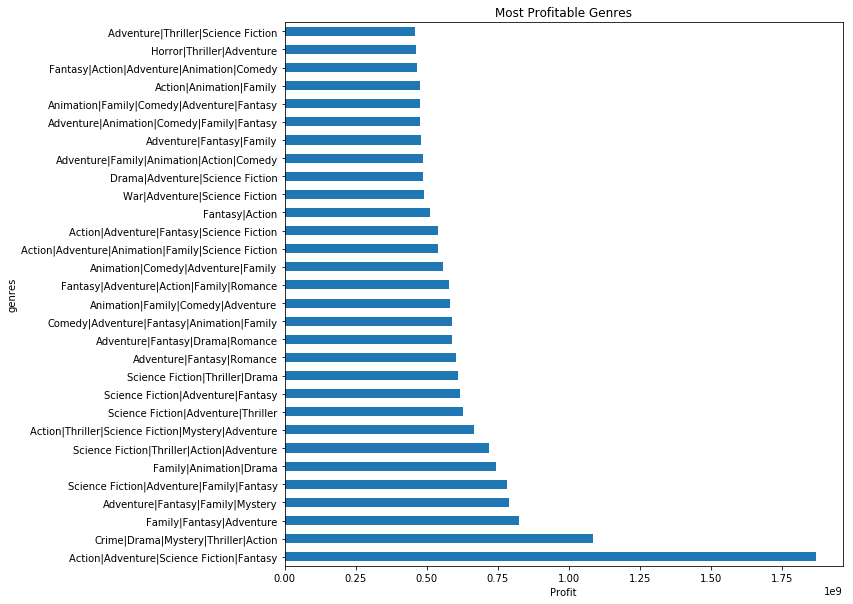

In [73]:
plt.subplots(figsize=(10,10))
df.groupby(["genres"])["profit"].mean().sort_values(ascending=False).head(30).plot(kind="barh");
plt.xlabel("Profit")
plt.title("Most Profitable Genres")
plt.show()

Note that you can hardly find a god movie that has only one genre, however i decided to do this part of the analysis without seperating the genres, it clear from the findings that the most profitable genres always have a touch of ADVEnture, FAntasy and science fiction or mystery amongst others

Lets cross validate with our high profit class

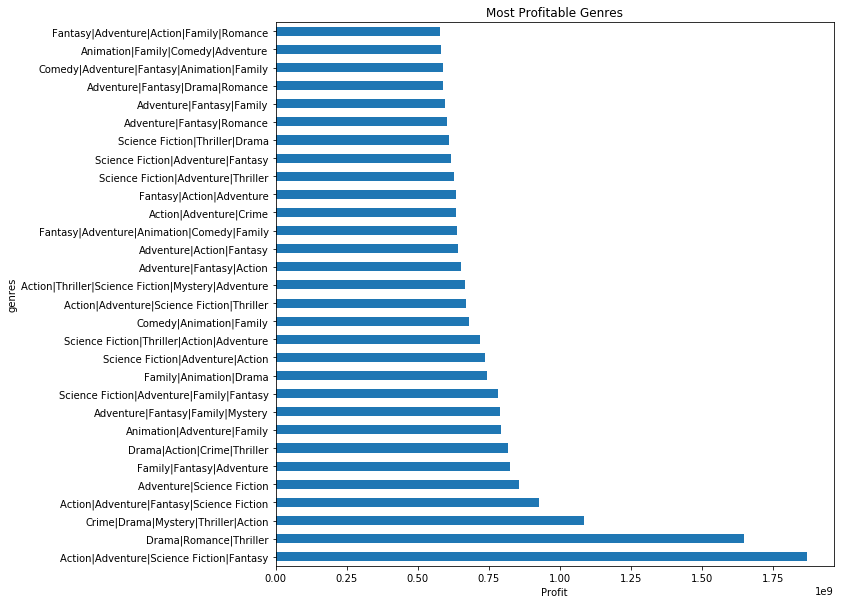

In [74]:
plt.subplots(figsize=(10,10))
high_profit.groupby(["genres"])["profit"].mean().sort_values(ascending=False).head(30).plot(kind="barh");
plt.xlabel("Profit")
plt.title("Most Profitable Genres")
plt.show()

This affirms our findings that a touch of adventure, science fiction or mystery and fantasy are associated with the most profit

Lets check in with the Low profit group

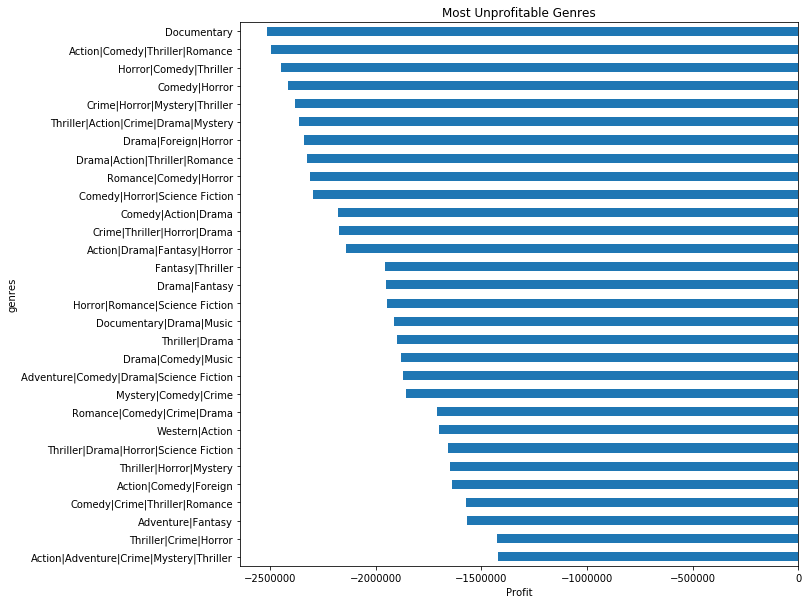

In [75]:
plt.subplots(figsize=(10,10))
low_profit.groupby(["genres"])["profit"].mean().sort_values(ascending=False).head(30).plot(kind="barh");
plt.xlabel("Profit")
plt.title("Most Unprofitable Genres")
plt.show()

We might want to avoid Documentaries as they stand out as the most unprofitable

## What group of genres are asociated with High popularity?

Lets check the entire data frame


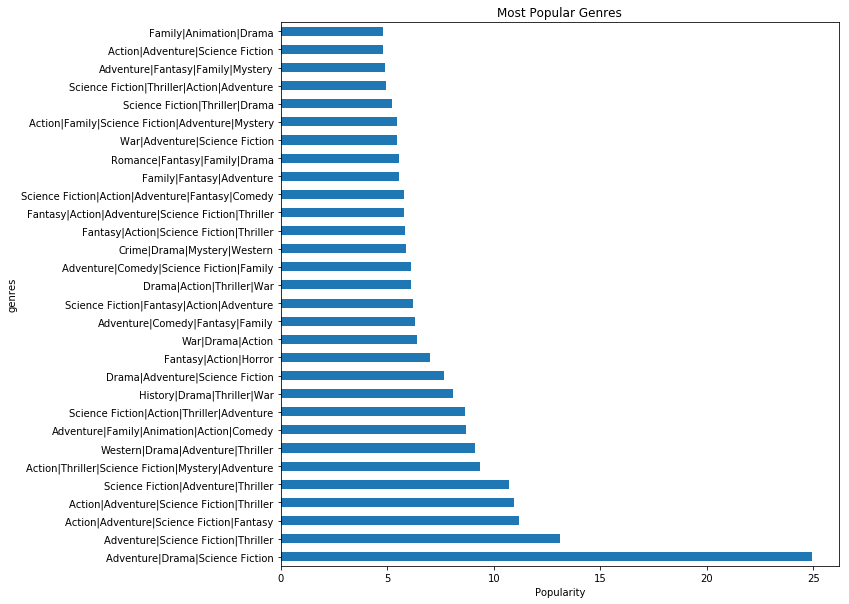

In [76]:
plt.subplots(figsize=(10,10))
df.groupby(["genres"])["popularity"].mean().sort_values(ascending=False).head(30).plot(kind="barh");
plt.xlabel("Popularity")
plt.title("Most Popular Genres")
plt.show()

WE can conclude that movies with genres of Adventure and science fiction are the most popular groups

Lets check the high popularity group

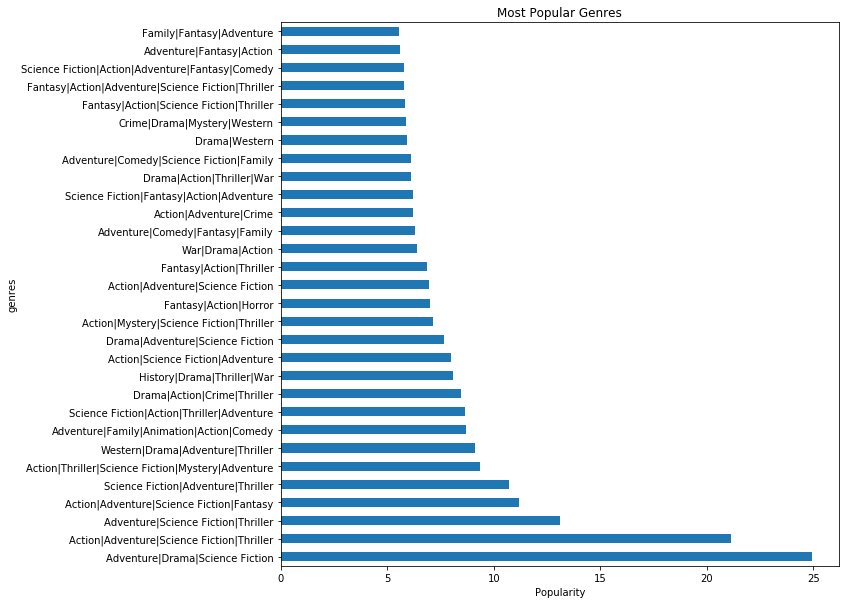

In [77]:
plt.subplots(figsize=(10,10))
high_pop.groupby(["genres"])["popularity"].mean().sort_values(ascending=False).head(30).plot(kind="barh");
plt.xlabel("Popularity")
plt.title("Most Popular Genres")
plt.show()

Our Findings are coherent

Lets check the low profit group

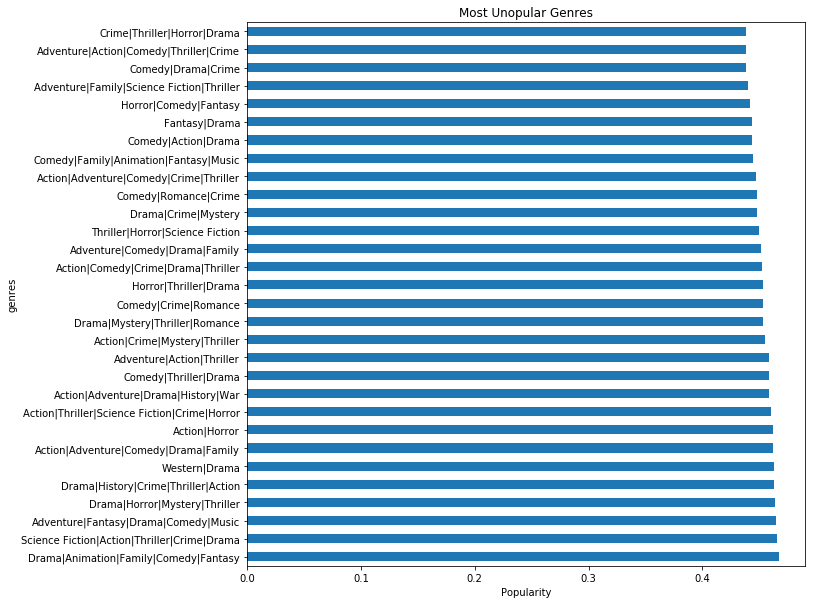

In [78]:
plt.subplots(figsize=(10,10))
low_pop.groupby(["genres"])["popularity"].mean().sort_values(ascending=False).head(30).plot(kind="barh");
plt.xlabel("Popularity")
plt.title("Most Unopular Genres")
plt.show()

Movies involving crime, horror and drama are mostly unpoplar

## What particular genres are most Profitable?

We wil need to see individual genres that are associated with the most successful movies

In [79]:
# Explode the genre column to remove the seperator
print(df.shape)
df = burst(df, "genres")
df.shape

(4165, 10)


(13882, 10)

Lets see the genre with the highest count in the dataframe

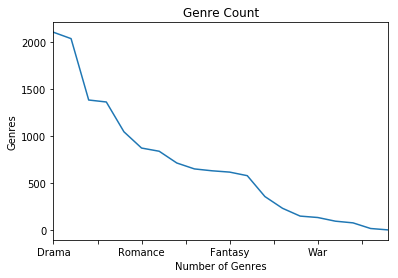

In [80]:
df.genres.value_counts().plot.line();
plt.ylabel("Genres")
plt.title("Genre Count")
plt.xlabel("Number of Genres");



Drama seems to have the highest occurrence

## Which genre is the most profitable?

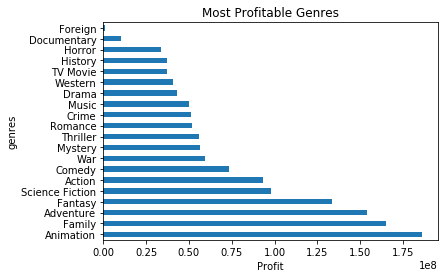

In [81]:
df.groupby('genres')['profit'].mean().sort_values(ascending=False).plot.barh();
plt.xlabel("Profit")
plt.title("Most Profitable Genres");

It apears that the most profitable genre is Animation, then Family after which we have the 3 combo we recommended earlier(Adventure, Fantasy and Science Fiction).
As we can see, the most unprofitable genres are Foriegn, Documentary and Horor

## What genres are most popular?


WE need to check how many unique genres we have 

In [82]:
df.genres.nunique()

20

Since we have just 20 unique genres, we can make our conclusions from the entire data Frame

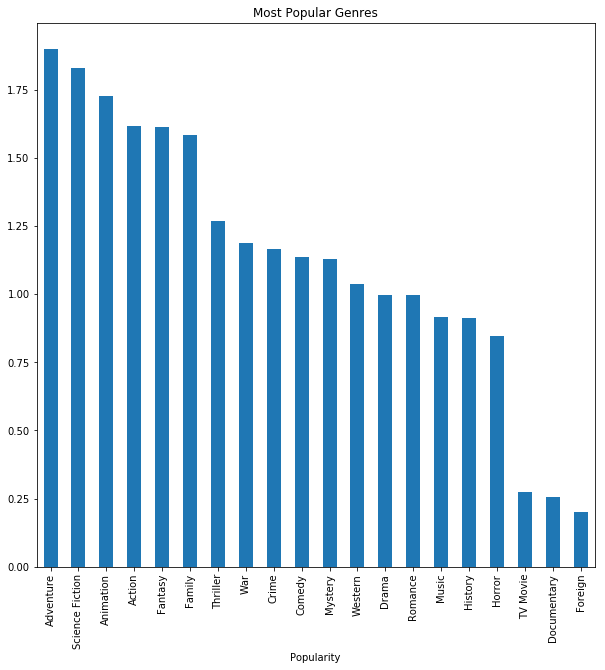

In [83]:
df.groupby("genres")["popularity"].mean().sort_values(ascending=False).plot.bar(figsize=(10,10))
plt.xlabel("Popularity")
plt.title("Most Popular Genres");

The most popular movies have a genre of Adventure, Science Fiction and Animation.
This also holds that the most unpopular genres are Foreign, Documentary, and Tv movie

## What genres are Profitable from year to year?


In [84]:
genre_profit=df.groupby(["release_year","genres"])["profit"].max()

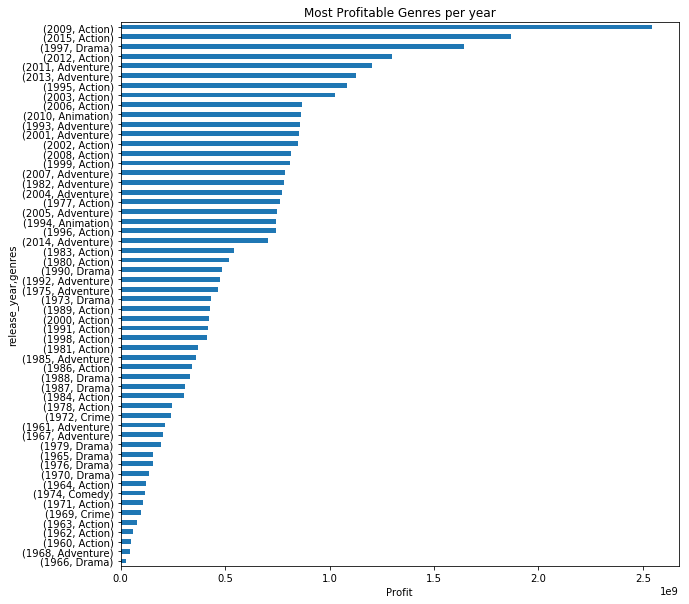

In [85]:
genre_profit[genre_profit.groupby(level=0).idxmax()].sort_values().plot.barh(figsize=(10,10))
plt.xlabel("Profit")
plt.title("Most Profitable Genres per year");

The dataset shows the most profitable genres in each, with the all time highest of Action and Adventure

## What genres are the most Popular from year to year?


In [86]:
genre_popularity=df.groupby(["release_year","genres"])["popularity"].max()

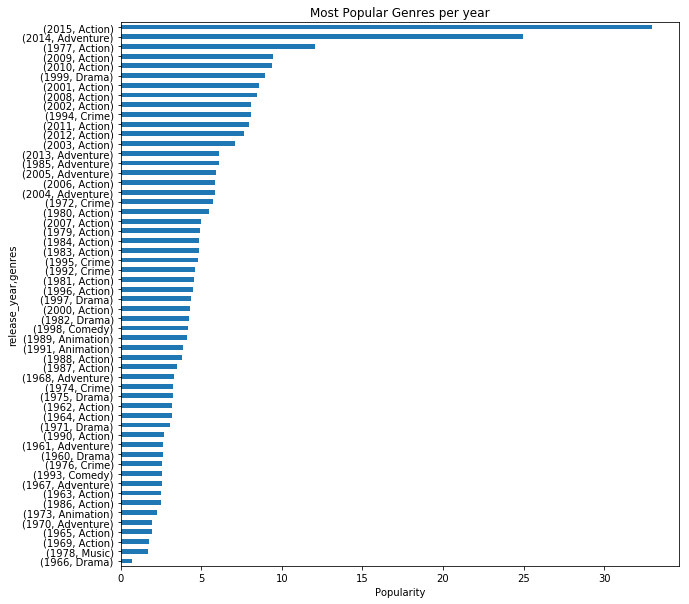

In [87]:
genre_popularity[genre_popularity.groupby(level=0).idxmax()].sort_values().plot.barh(figsize=(10,10))
plt.xlabel("Popularity")
plt.title("Most Popular Genres per year");

The dataset shows the most popular genres in each, with the all time highest of Action and Adventure

<a id='conclusions'></a>
## Conclusions

>In conclusion,  the dataset reveals that the most profitable and most popular year in the movie industry is the year **2015** and movies released in the **second quater** of the year is more likely to be popular and proftable than movies released at other months
it also revealed that the most successsful directors are **Colin Treverrow and Jennifer Lee** while the Director with the most movies directed is Steven Speilberg. it also revealed that the most popular director is **Colin Treverrow**.
I decided to find the most profitable and popular group of genres because most movies have more than one genres which had a touch of **Adventure, Fantasy, Science Fiction, Action, Animation and Family**. These findings were confirmed when we computed the individual genres profitablity and popularity. Then i computed the most profitable and popular genres each year and **Adventure and Action** occurred more.
However additional research can be done to understand how runtime affects popularity and profitability of the movies

> **Limitation** :
Due to the abseence of a data dictionary, the data description is solely based on personal research of the naming concepts, however, some columns were difficult to work with e.g the votes. The budget, revenue and runtime had about 5000 zero values, hence i had to drop them all to preserve the intergity of the conclusions since we are dealing with profitability

> **Resources** : 

>[Stack Overflow Date time converting](https://stackoverflow.com/questions/70596944/pandas-to-datetime-converting-71-to-2071-instead-of-1971)

>[Pandas Documentation Using the explode function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html)

>[Understanding Quartile wikipedia](https://en.m.wikipedia.org/wiki/Quartile)

>[Analytics Vidhya using groupby in pandas](https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/)

>[Pandas Groupby](https://datagy.io/pandas-groupby/)

>[Kaggle]()

In [88]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'The Movie DataBase Data Analysis.ipynb'])

0